# Exercise: Feature scaling

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


## Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [75]:
house_data = pd.read_csv('kc_house_data.csv')

house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [76]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Task
You want to use this data to predict house prices. You decide to start with a simple [linear regression model with parameters estimated via the least-squares method](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).
Under this model, for each sample $i$ you have:
$$y_i  = \beta_0 + \beta_1 {\bf x_i}^{(1)} + \cdots + \beta_n {\bf x_i}^{(n)} + \epsilon$$

Relating these variables to your dataframe, you have that:
- The target variable $y_i$ that you want to predict is `price`.
- The variables  ${\bf x}_i$ correspond to the other columns in the data frame. They can be used as features (aka. predictors)  in your task. Those form your data matrix $X$ (aka design matrix)

In addition:
- $\beta_i$ are your regression coeficients, that will be estimated from data.
- $\epsilon$ is and additive error term

### Preparing your training data



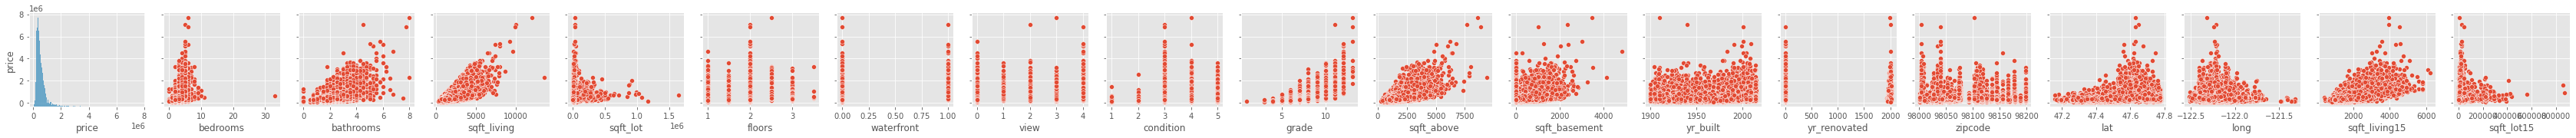

In [78]:
sns.pairplot(data=house_data.drop(columns=['id', 'date']), y_vars=['price'])

In [4]:
X = house_data.drop(columns=['id','price', 'date'])
y = house_data.price

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

### Fitting a model
We are going to use an implementation from Scikit-learn to fit our linear model:

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

Here is the R² coefficient of the regression computed on the points used to fit its coefficients (the points in the training set):

In [31]:
model.score(X_train, y_train)

0.6974817116762753

And here is the R² coefficient computed on the test set:

In [32]:
model.score(X_test, y_test)

0.7048466077761752

## Problem
Your model was not really well adapted to your data, as indicated by your R² coefficients. The closer the value is to one, the better fit your model was.

A linear model assumes that the errors $\epsilon$ will be normaly distributed with mean zero. If the mean of erros was zero, the relationship between predicted prices and real prices would be centered on the 45 degree dashed line.

Text(0, 0.5, 'predicted price')

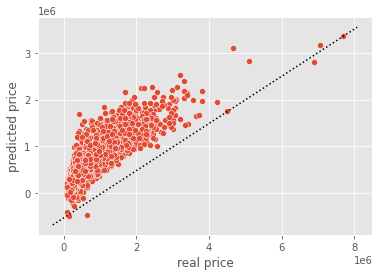

In [33]:
predictions = model.predict(X_train)  # make the predictions by the model
residuals = predictions - y_train
sns.scatterplot(x=y_train, y=predictions)
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')


In [47]:
residuals.describe()

count    1.620900e+04
mean     8.240444e-09
std      1.981730e+05
min     -4.340937e+06
25%     -7.692894e+04
50%      9.818840e+03
75%      9.973627e+04
max      1.267282e+06
Name: price, dtype: float64


If we plot the histogram of errors, we see their distribution is not normal and heavy tailed to the left:

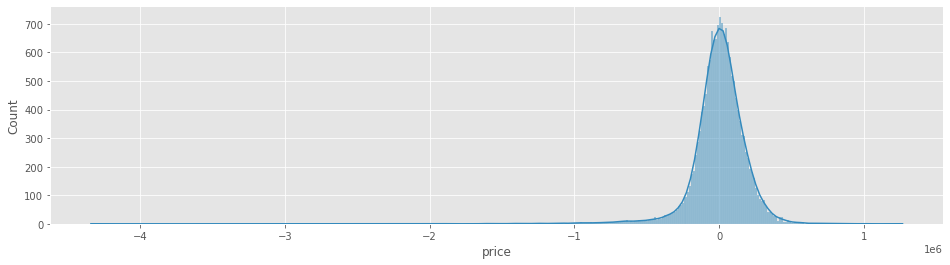

In [49]:
sns.histplot(x=residuals, kde=True)
plt.gcf().set_size_inches(16,4)

A linear model also assumes a linear relationship between the target features and the predictor features. This could be observed using scatter plots (if it were true):

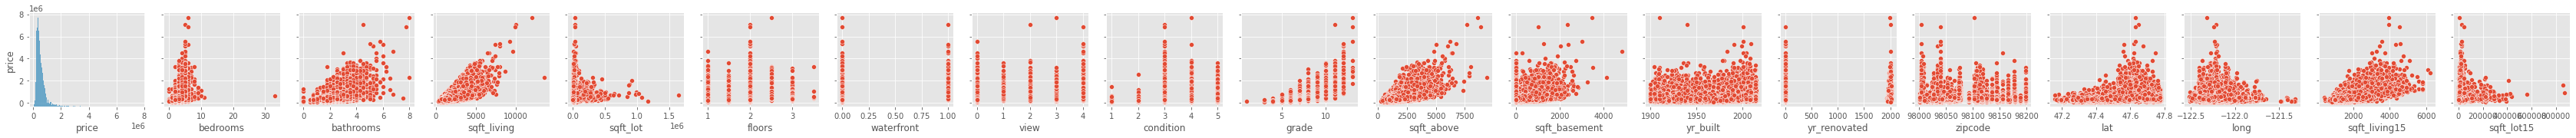

In [ ]:
sns.pairplot(data=house_data.drop(columns=['id', 'date']), y_vars=['price'])

If the relationship between predictors and target is linear, they should have similar distributions (up to a linear transformation). The presence of outliers, among other factors, may violate this assumption.

## Your turn

One common solution to this problem is to apply the different outlier handling techniques we just saw to the different features in order to recode/rescale/transform the features so that data better complies to the linear relationship assumption.

You may for instance try to get all features to be closer to a normal distribution.

Scikit-learn proposes some implementation of some transforms we saw in the course. An [article comparing the methods on features having outliers is available](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Among these you can find:
- The Box-Cox transoformation that can be done using the [PowerTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#powertransformer)
- Winsorizing that can be achieved using [QuantileTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#quantiletransformer-uniform-output)


1. Take a look at the stats, histograms and box-plots for the different variables in the dataframe
2. Which features look like good candidates for winsorizing?
3. Which features look like good candidates for Box-Cox transformations?
4. If you have time, test your plan by fitting a new regression model and comparing the results


In [9]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


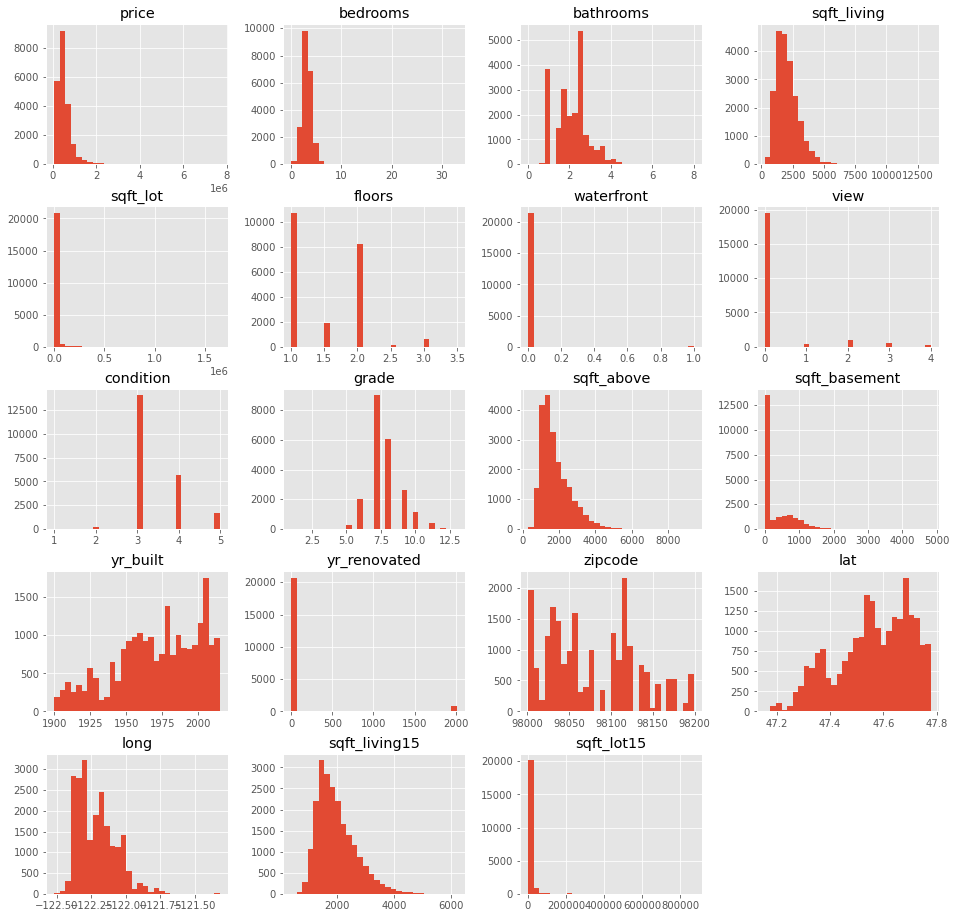

In [53]:
_ = house_data.drop(columns=['id', 'date']).hist(bins=30, figsize=(16,16))

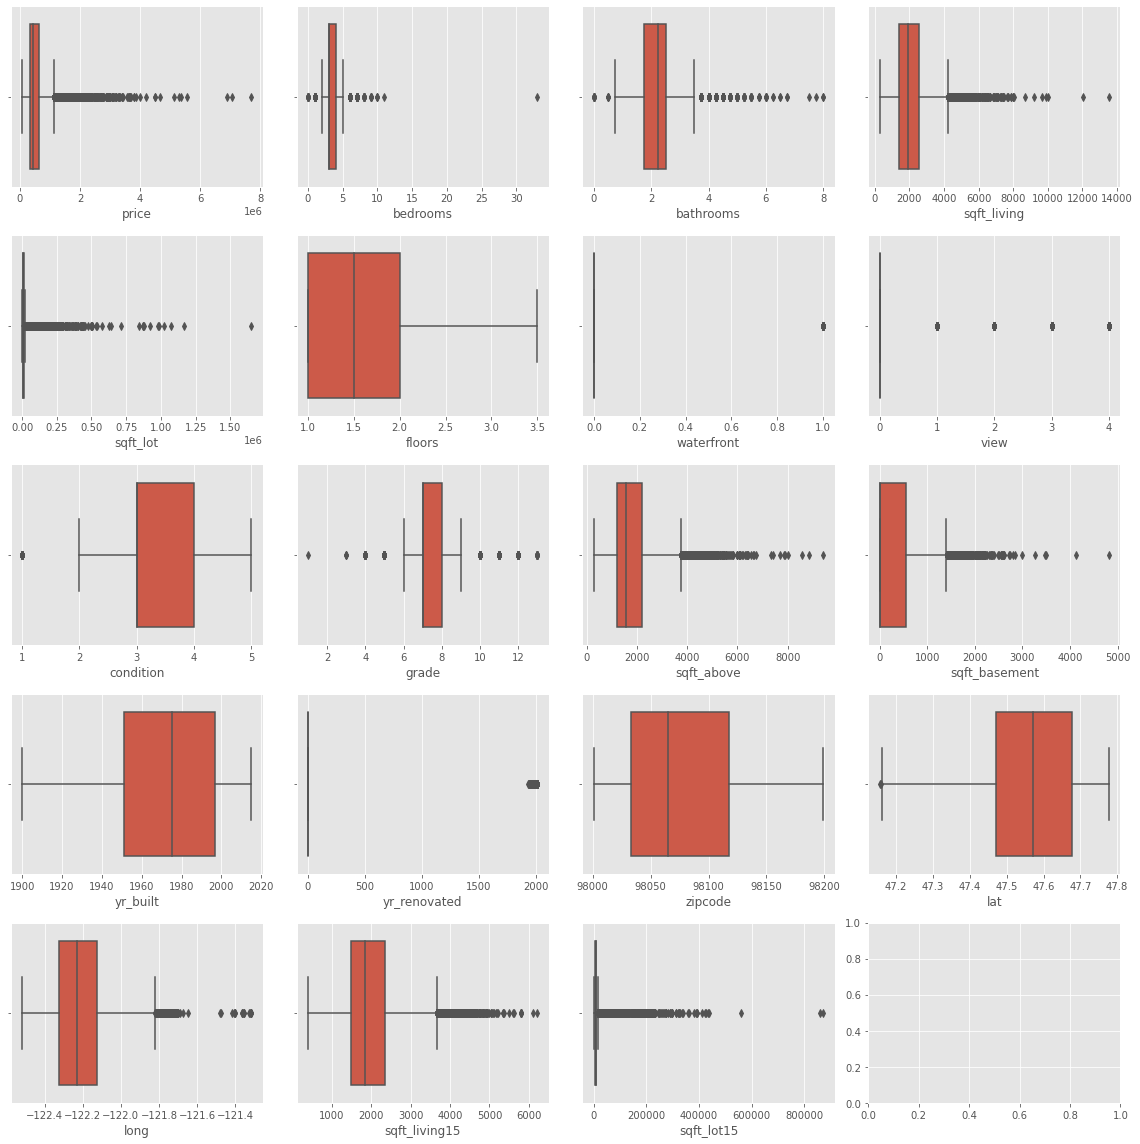

In [28]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = house_data.drop(columns=['id', 'date'])
for i, col in enumerate(df):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

In [64]:
model2 = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=RobustScaler()
    )


model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.6974817116762754

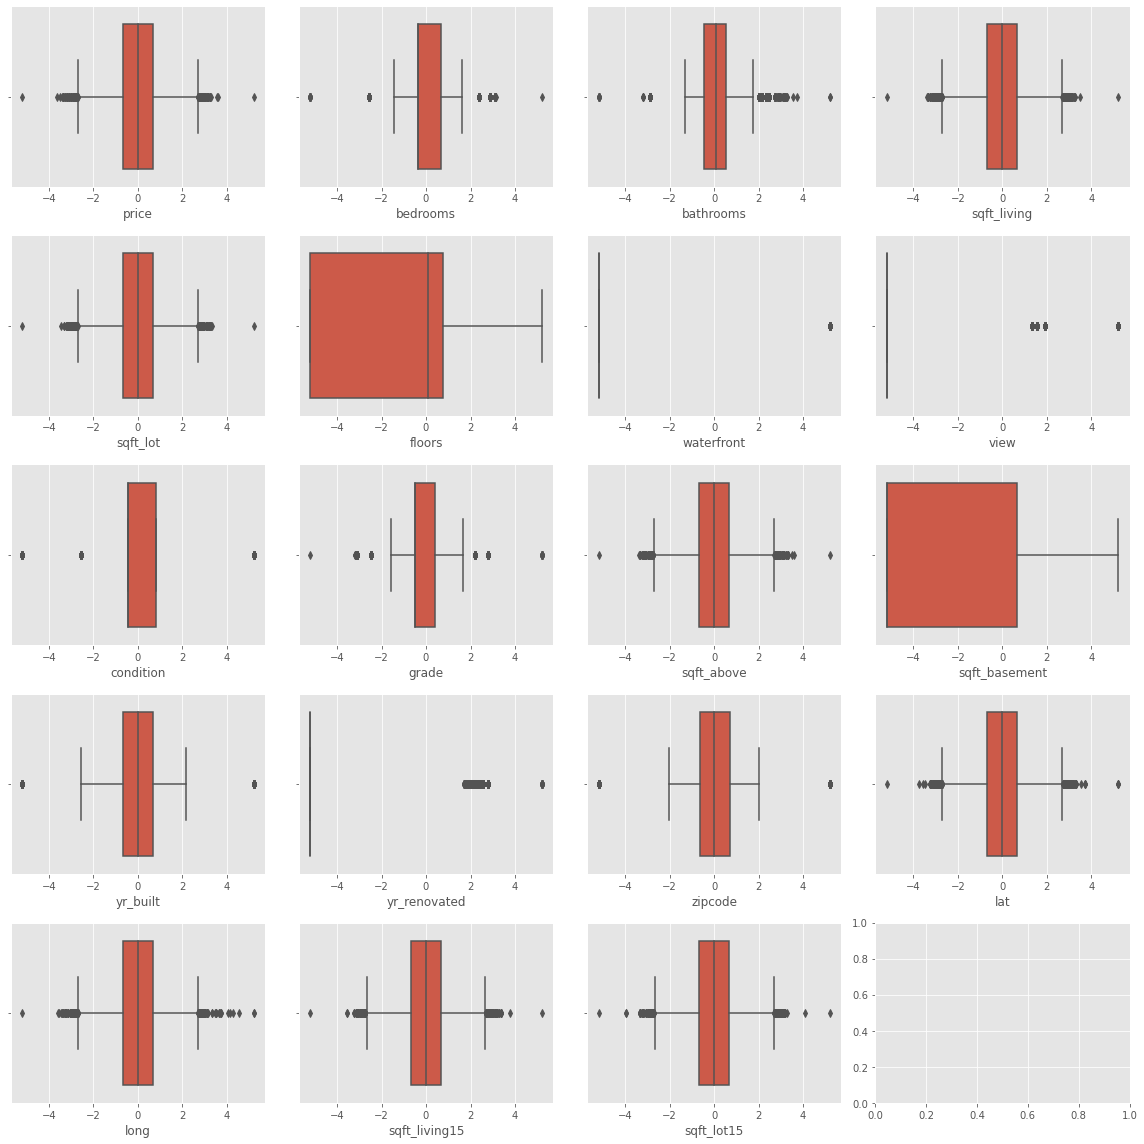

In [73]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer

tranformer = QuantileTransformer(output_distribution='normal')
data = house_data.drop(columns=['id', 'date'])
data_transf = tranformer.fit_transform(data)
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = pd.DataFrame(data=data_transf, columns=data.columns)
for i, col in enumerate(df):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

C:\Users\Thalita\miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Thalita\miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\Thalita\miniconda3\envs\ml-latest\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Thalita\miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\Thalita\miniconda3\envs\ml-latest\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


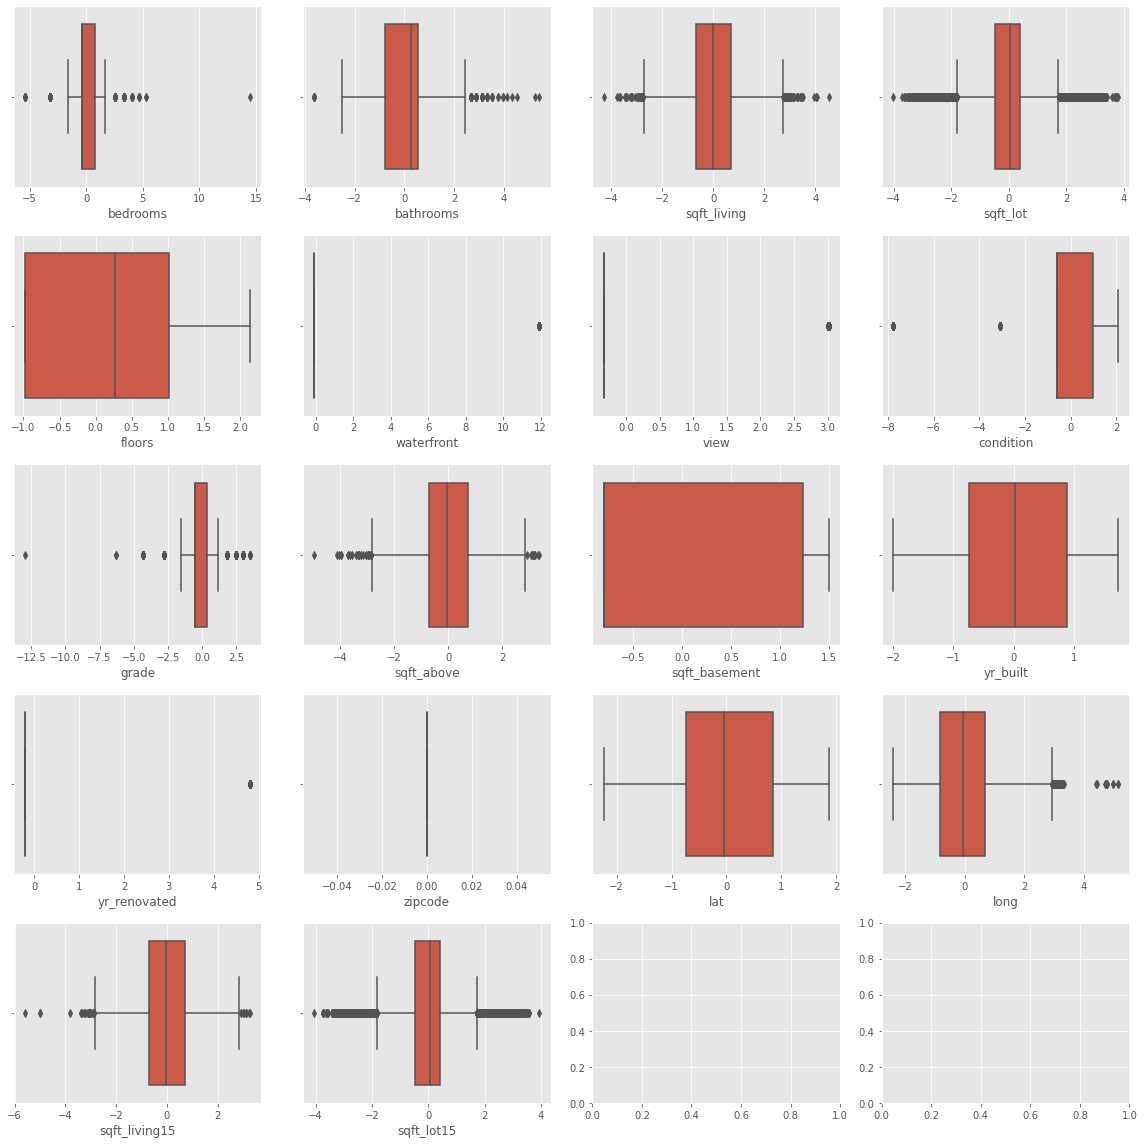

In [72]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer

tranformer = PowerTransformer()
X_train_transf = tranformer.fit_transform(X_train)
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = pd.DataFrame(data=X_train_transf, columns=X_train.columns)
for i, col in enumerate(df):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

In [ ]:

tranformer = QuantileTransformer(output_distribution='normal')
X_train_transf = tranformer.fit_transform(X_train)
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = pd.DataFrame(data=X_train_transf, columns=X_train.columns)
for i, col in enumerate(df):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

### Example of applying feature scaling prior to regression

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer


column_trans = make_column_transformer(
    (PowerTransformer(method="yeo-johnson", standardize=False), ['bedrooms']),
    (QuantileTransformer(output_distribution='normal'), ['grade']),
    remainder='passthrough'
)

X_train_transf = column_trans.fit_transform(X_train)



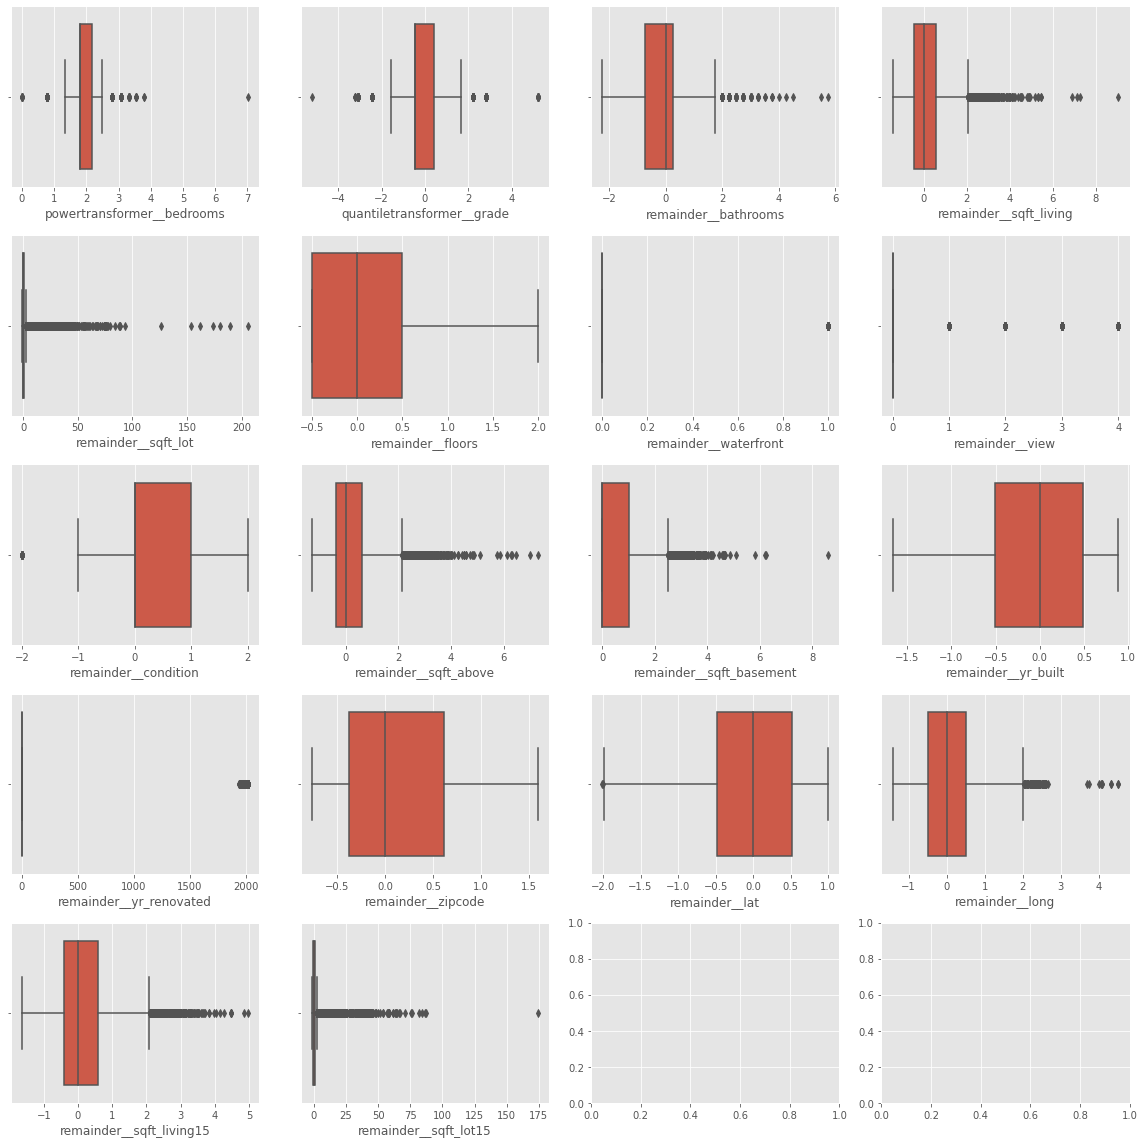

In [70]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = pd.DataFrame(data=X_train_transf, columns=column_trans.get_feature_names_out())
for i, col in enumerate(df):
    sns.boxplot(data=df, x=col, ax=axs[i])
plt.tight_layout()

In [ ]:

model2 = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=PowerTransformer(method="yeo-johnson", standardize=True)
    )


model2.fit(X_train_transf, y_train)
model2.score(X_train_transf, y_train)